<a href="https://colab.research.google.com/github/ChihabEddine98/ML_Go/blob/master/lecture_1/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import time
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from google.colab import files
files.upload()
# End Imports

Saving demo-linear.npz to demo-linear.npz


{'demo-linear.npz': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\x0e\\\xac\x18\x92\xa6\x17\x00\x80j\x18\x00\x05\x00\x14\x00X.npy\x01\x00\x10\x00\x80j\x18\x00\x00\x00\x00\x00\x92\xa6\x17\x00\x00\x00\x00\x00\x9c\x9a\xf97U\xdf\xff\xc7\xef\xe4\xba\xe61\xca\x94P$\xc9L\xa4\xbd\x13\x11%i\x92z\x97d\n!S\x12\x92D\xca\x18E\x94\x0cQ\xc6$\xa4\xc9>\xc6d\xce<\xcf\xf3x]\xd7<}}\xfe\x85\xef\xfe\xe5\xac\xb3\xd7Y\xe7\x9c\xb5\xf7\xeb\xf5|>\x9ek\xedH\xc3Kg\x8d\xae\xe2q\xee\xb8\x87\x92\x16\x96.\xb7\x9d%\xd5E%\x8fY\xa9I\xca\x88JZ9:\xbb:\xdfr\xb8\xe9\xe8la\xf9\xbf\xf9S\xb7\xec],w\xe6]ln9Y\xee\xdcK\xc9\xcb\xed\x0c\x19Q\x05\xb9\x832\xa2\xde\xa2\xff\x9f\xc1\x9c\xf5\xe4\xfb\x87{w\x18 M\xd2tx4\xa0\x0b\x14\xfe\xe3\xb9o\xd7\xd0\x0b\xae\x85D\x13.6.\x01\xda\x8d M\xdd\xfd\x9bh\x16n\x14\xda\t3@\xea\xa2;s~\x06\t\xfex:\xd6\x1e\x16\xbf\x06b\x11O\xecU\x95y\x14\xfc\xb2\xfeK\xb9|1:\xf6\xba\x15\xab\x17)A[\xad,+\x8dx\x16\xd8\xe0g\xa9\xdcn\xb5\x80\xb4?\xa3\xf1\x82z\x1aP:\xf9I\xc0\\f\x0e5\xbez6`\xbd\x89\xc3l\x9e{\t\x1dvJF\xbe

 Ellapsed time : 0.0010306835174560547 
[98.90957661 59.68661447]


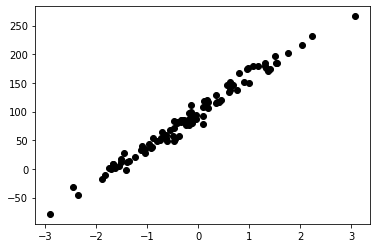

In [2]:
# Load data
X,Y,coef= datasets.make_regression(n_samples=100, n_features=1, n_targets=1, bias=100.0, noise=10, shuffle=True,coef=True)
plt.plot(X,Y, 'ko')

# Question 01 : 1 @ X
X = np.concatenate([np.full((X.shape[0],1),1),X], axis = 1)

# Question 02 : beta
t_before = time.time()
XtX , XtY = X.T @ X , X.T @ Y
beta = np.linalg.inv(XtX)@ XtY
t_after = time.time()
print(f' Ellapsed time : {t_after - t_before} ')
print(beta)

# Question 03 : (QR).T*QR*beta = (QR).T*Y
#          iff  R.T*R*beta = R.T*Q.T*Y

# Question 04 : beta = (R.T)**(-1)*Q.T*Y


In [3]:
# Question 05 : 
t_before = time.time()
Q , R = np.linalg.qr(X)
beta_qr = np.linalg.solve(R, Q.T @ Y )
t_after = time.time()
print(f' Ellapsed time : {t_after - t_before} ')
print(beta_qr)

 Ellapsed time : 0.019279003143310547 
[98.90957661 59.68661447]


Ellapsed time : 0.003750324249267578


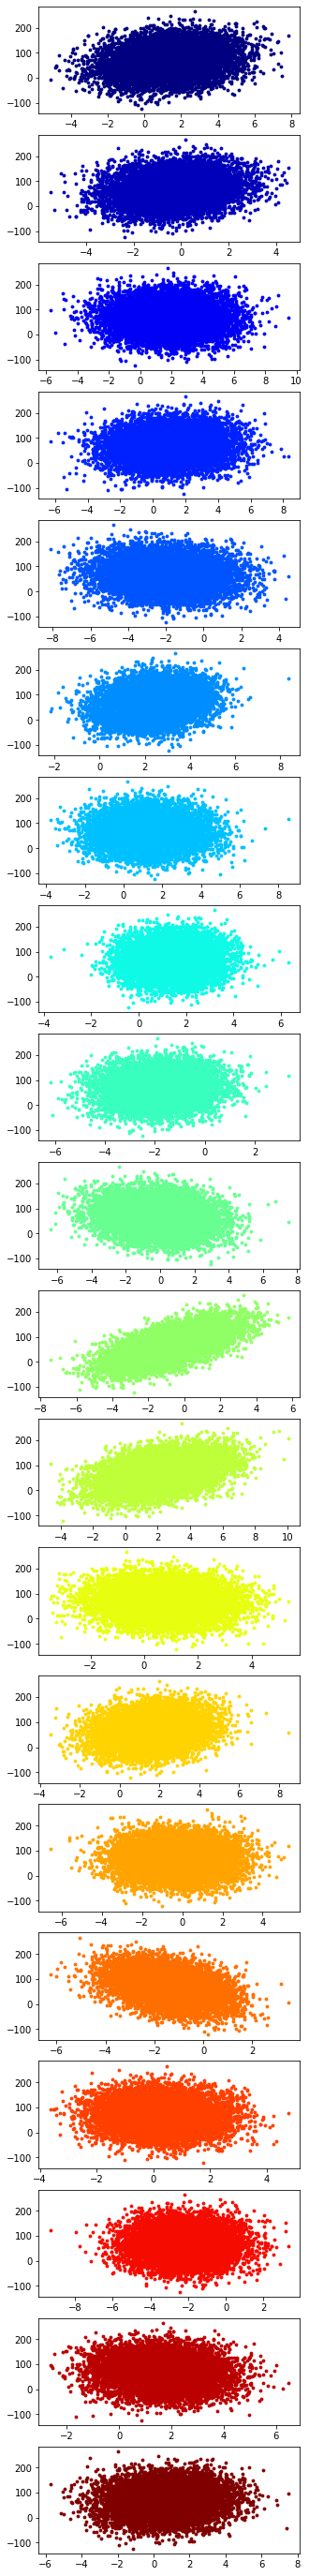

In [21]:
# Load Data
data = np.load('demo-linear.npz')
X , Y  = data['X'] , data['Y']
data.close()
m = X.shape[1]


# Plot all marginales Y = F(X_j)
fig , axs = plt.subplots(m , 1 , figsize = (5,50))
colors = plt.cm.jet(np.linspace(0,1,m))
for j in range(m):
  axs[j].scatter(X[:,j],Y, marker = 'o', color = colors[j], s = 8)


# Question 01 : Add one in first column of X
# ALt : np.append(np.ones((X.shape[0],1)),X)
X = np.concatenate([np.full((X.shape[0],1),1),X],axis = 1)

# Question 02 : solve the optimization problem , to compute beta = (X^t*X)^-1 X^t*Y  
t_before = time.time()
XtX = X.T.dot(X)
XtY = X.T.dot(Y) 
beta = np.linalg.inv(XtX).dot(XtY)
t_after = time.time()
print(f'Ellapsed time : {t_after-t_before}')